In [31]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import scipy.cluster.vq as vq

In [33]:
GRAYSCALE = 0

In [34]:
detector = cv2.xfeatures2d.SURF_create()

# Training

In [35]:
gray = cv2.imread('plane.jpg', GRAYSCALE)
keypoints, descriptors = detector.detectAndCompute(gray, None)
print("# kps: {}, descriptors: {}".format(len(keypoints), descriptors.shape))

# kps: 363, descriptors: (363, 64)


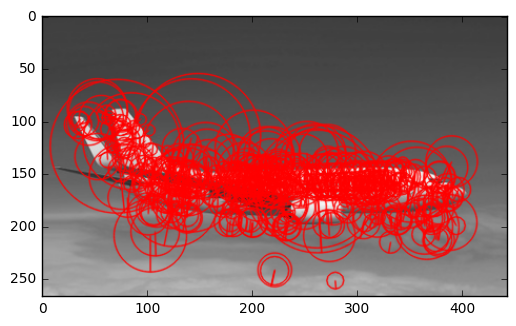

(<matplotlib.image.AxesImage at 0x7f593009d3c8>, None)

In [36]:
img2 = cv2.drawKeypoints(img,kps,None,(255,0,0),4)
plt.imshow(img2),plt.show()

In [47]:
dictionarySize = 5
bowTrainer = cv2.BOWKMeansTrainer(dictionarySize)
bowTrainer.add(descriptors)
codebook = bowTrainer.cluster()

# Testing

In [48]:
matcher = cv2.BFMatcher()
bowExtractor = cv2.BOWImgDescriptorExtractor(detector, matcher)
bowExtractor.setVocabulary(codebook)

In [49]:
gray = cv2.imread('example.png', GRAYSCALE)
keypoints, descriptors= detector.detectAndCompute(gray, None)
bowDescriptors = bowExtractor.compute(gray, keypoints)
print(bowDescriptors)

[[ 0.13521695  0.11099899  0.25227043  0.25630677  0.24520686]]
